# Arbres décisionnels

Apprentissage supervisé - Regression, DecisionTreeRegressor

## Préparation des données

### Téléchargement de données
Téléchargez le jeu de données housing.csv.
Placez le dans le même répertoire de votre fichier (Python ou Notebook).


### Information sur les données
1. Créez un code qui lit le fichier "housing.csv"
et affiche ses premières lignes.
Pour ce faire, utilisez les fonctions "read_csv" et "head" de la bibliothèque pandas.


In [361]:
import pandas as pd

df = pd.read_csv("housing.csv")

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Sachant que la valeur cible est "median_house_value", traitons-nous un problème de classification ou de régression ?

In [362]:
df.median_house_value.dtype
# Valeurs continues -> Régression

dtype('float64')

2. Créez un code qui affiche le nombre de lignes et de colonnes des données, le type des attributs et le nombre de valeurs non nulles.


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Quelle remarque sur l’attribut "total_bedrooms" par rapport aux autres attributs ?


    C'est une colonne qui contient moins de valeurs que les autres.

In [340]:
df.total_bedrooms.isnull().sum()

207


3. A travers la question précédente, vous avez du remarquez que le type dans valeurs utilisées dans l’attribut "ocean_proximity" est un objet (forcément un texte vu qu’on manipule un fichier CSV).
Il est intéressant de connaître ses valeurs.
Pour cette finalité, créez un code qui affiche l’occurrence des valeurs utilisées dans cet attribut.

In [341]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


4. Créez un code qui affiche des statistiques sur les attributs de ton jeu de données.

In [342]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000



5. Créez un code qui affiche les histogrammes des différents attributs.
Le nombre de "bins" à saisir est 50 et la taille de chaque histogramme "figsize=(20,15)".

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B855183820>,
      dtype=object)

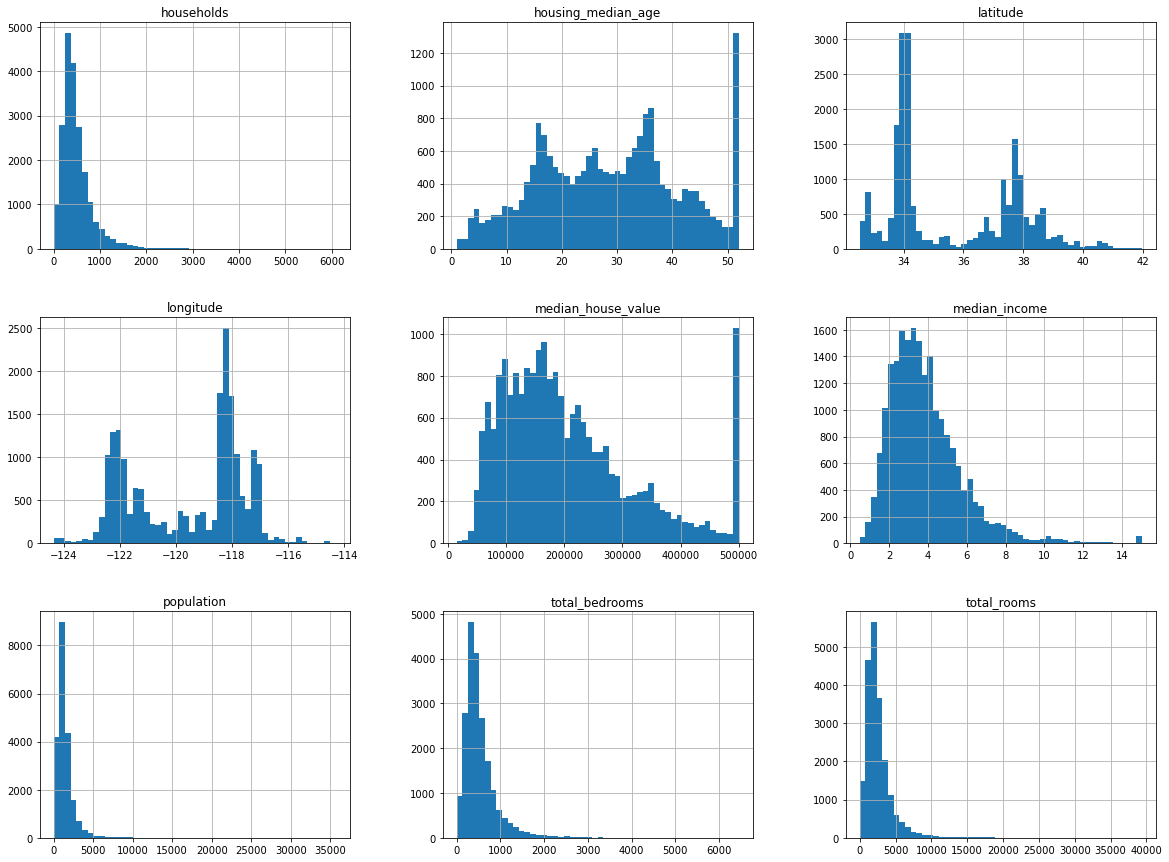

In [366]:
df.hist(bins=50, figsize=(20, 15))


### Répartition des données

1. Créez un code qui partitionne les données en base d’apprentissage et base de test. Optez pour 80% pour l’apprentissage et 20% pour le test.

In [368]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size = 20/100, random_state = 42)

y = df.median_house_value
X = df.drop("median_house_value", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 20/100, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))


2. Affichez l’en-tête de la base de test

In [370]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


Nous nous intéresserons par la suite uniquement à la base d’apprentissage.
Pour cette raison, le terme données fera référence à la base d’apprentissage.

### Découverte et visualisation des données
L’information géographique (latitude et longitude) existe dans la base de données, il est intéressant de créer des graphes illustrant une visualisation géographique des données.

1. Créez un code qui affiche en abscisse la longitude et en ordonnée la latitude.
Optez pour le type scatter dans la fonction plot pour l’affichage et une valeur d’alpha (c’est un paramètre qui joue sur la transparence de la courbe) de 0.1 pour un affichage plus clair.

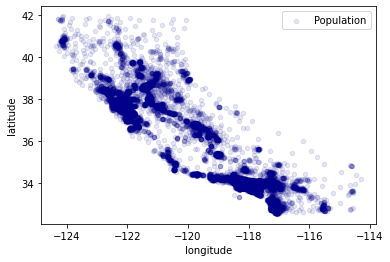

In [371]:
df.plot.scatter(x='longitude',
                y='latitude',
                label="Population",
                alpha=0.1,
                c='DarkBlue')

2. Créez un code qui permet d’avoir une idée sur le lien entre la position géographique et le prix des maisons (target).Optez pour une valeur égale à False de "sharex".

In [347]:
df[['longitude', 'latitude', ]].corrwith(df['median_house_value'])

longitude   -0.045967
latitude    -0.144160
dtype: float64

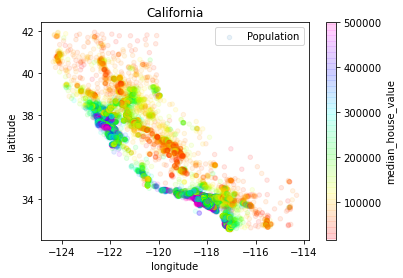

In [373]:
df.plot.scatter(x='longitude',
                y='latitude',
                c='median_house_value',
                alpha=0.1,
                sharex=False,
                title='California',
                label="Population",
                cmap='gist_rainbow')
                #cmap='Accent')

3. Modifiez le graphe de la question précédente pour savoir la raison du prix élevé de quelques maisons.

Pour ce faire :
- Téléchargez l’image de la californie
- Utilisez la fonction imread du sous-module image du module matplotlib
- Utilisez la fonction imshow du sous-module pyplot du module matplotlib

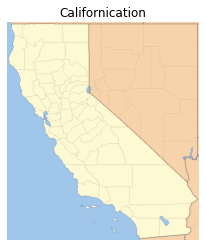

In [376]:
import matplotlib.pyplot as plt 

img_array=plt.imread("california.png")  #[0:300,0:300]
plt.imshow(img_array)
plt.title('Californication')
plt.axis('off')
plt.show()

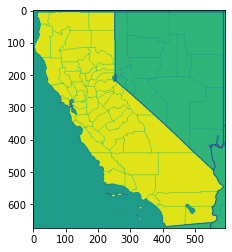

In [383]:
img_array.shape
# (674, 594, 3) : Taille : 674*594 en 3 couleurs (RGB)

#plt.imshow(img_array[1,:,:])
#plt.imshow(img_array[:,1,:])
plt.imshow(img_array[:,:,1])

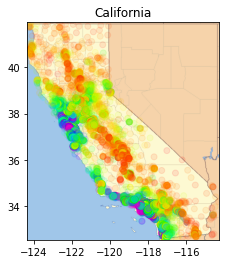

In [374]:
img_california=plt.imread("california.png")

plt.title('California')

plt.imshow(img_california, zorder=0, extent=[df.longitude.min(), df.longitude.max(), df.latitude.min(), df.latitude.max()])
aspect=img_california.shape[0]/float(img_california.shape[1])*((df.longitude.max() - df.longitude.min())/(df.latitude.max() - df.latitude.min()))
plt.gca().set_aspect(aspect)

plt.scatter(x=df.longitude,
            y=df.latitude,
            zorder=1,
            c=df.median_house_value,
            alpha=0.1,
            label="Population",
            cmap='gist_rainbow')
            #cmap='Accent')

plt.show()



4. Une pratique très intéressante dans l’analyse de données est l’étude des corrélation entre les variables.

Créez un code qui affiche, en valeur, la corrélation de l’attribut "median_house_value" avec les autres attributs.

Qu’est ce que vous remarquez ?

In [351]:
df.corrwith(df.median_house_value)

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
dtype: float64

In [352]:
# La valeur du bien est corrélé avec le revenu moyen de leur propriétaire

## Nettoyage des données
Avant d’intégrer les données dans un algorithme d’apprentissage automatique, il est indispensable de séparer le "features" et la valeur cible (target).

1. Créez un code permettant de créer deux variables :

 - Une première contenant que les input. Utilisez la fonction drop du module pandas
 - Une deuxième contenant que les labels. Utilisez la fonction copy du module pandas

In [384]:
inputs = train_set.drop("median_house_value", axis=1)

labels = train_set.median_house_value.copy()

inputs.head()
labels.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64


2. Dans la question 8, vous avez dû remarquer que l’attribut "total_bedrooms" a des valeurs manquantes (NaN).

Pour remédier à ceci, il existes trois options :
- Supprimer les valeurs manquantes (NaN)
- Supprimer l’attribut "total_bedrooms"
- Remplacer les valeurs manquantes par une autre valeur (0, la moyenne, la médiane, ...)
Nous optons pour cette méthode.

Ecrivez un code qui remplace les valeurs manquantes par la médiane.

In [354]:
inputs.info()
inputs.total_bedrooms.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


207

Utilisez les fonctions median et fillna du module Pandas.

In [355]:
# df[df.columns] = df[df.columns].apply(pd.to_numeric, errors='coerce')

inputs.total_bedrooms = inputs.total_bedrooms.fillna(inputs.total_bedrooms.median())  # works

Vérifiez avec la fonction "info" si le problème a été résolu.

In [356]:
inputs.info()
inputs.total_bedrooms.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


0


3. Les algorithmes d’apprentissage profond préfèrent travailler avec des données numériques.
Ceci est valable pour tous les attributs sauf "ocean_proximity".
Vérifiez ceci en affichant 10 de ces valeurs.

In [357]:
df.ocean_proximity.sample(frac=0.42)

16609     <1H OCEAN
478        NEAR BAY
3885      <1H OCEAN
11285     <1H OCEAN
7138      <1H OCEAN
            ...    
20298    NEAR OCEAN
2661      <1H OCEAN
1887         INLAND
17646     <1H OCEAN
3194         INLAND
Name: ocean_proximity, Length: 8669, dtype: object

Transformer les valeurs qualitatives en des valeurs numériques.

In [385]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(df.ocean_proximity)
list(le.classes_)

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']


4. Affichez les données pour vérifier le résultat.

In [386]:
inputs.ocean_proximity = le.transform(inputs.ocean_proximity)

inputs.ocean_proximity.head()

14196    4
8267     4
17445    4
14265    4
2271     1
Name: ocean_proximity, dtype: int32

In [387]:
list(le.inverse_transform(inputs.ocean_proximity))

['NEAR OCEAN',
 'NEAR OCEAN',
 'NEAR OCEAN',
 'NEAR OCEAN',
 'INLAND',
 '<1H OCEAN',
 '<1H OCEAN',
 'NEAR BAY',
 '<1H OCEAN',
 '<1H OCEAN',
 'NEAR BAY',
 '<1H OCEAN',
 'INLAND',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 'INLAND',
 '<1H OCEAN',
 '<1H OCEAN',
 'INLAND',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 'INLAND',
 'NEAR BAY',
 'INLAND',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 'INLAND',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 'INLAND',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 'INLAND',
 'INLAND',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 'INLAND',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 'NEAR BAY',
 'INLAND',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 'NEAR BAY',
 '<1H OCEAN',
 '<1H OCEAN',
 'NEAR OCEAN',
 'NEAR OCEAN',
 '<1H OCEAN',
 'INLAND',
 'INLAND',
 'NEAR BAY',
 '<1H OCEAN',
 '<1H OCEAN',
 '<1H OCEAN',
 'NEAR OCEAN',
 'INLAND',
 'NEAR OCEAN',
 'NEAR OCEAN',
 'NEAR OCEAN',
 '<1H OCEAN',
 'INL

## Sélection, apprentissage et évaluation du modèle

1. Créez un code permettant d’appliquer la régression linéaire sur les données d’apprentissage.


2. Créez un code qui prédit les classes de la base d’apprentissage.

Pour ce faire, utilisez la méthode predict de la classe LinearRegression en donnant comme argument les données d’apprentissage.

Ensuite, affichez les valeurs cible réelles et celles prédites.

3. Calculez la mesure RMSE du modèle de la régression linéaire.

4. Refaites les deux étapes précédentes avec le modèle DecisionTreeRegressor.

Calculez la mesure RMSE du modèle DecisionTreeRegressor qui existe dans le sous-module tree du module sklearn.

Pour plus d’informations sur les arbres de décision:

http://cedric.cnam.fr/vertigo/cours/ml2/tpArbresDecision.html

5. Même si la valeur de RMSE de DecisionTreeRegressor est égale à 0, on ne peut pas conclure que ce modèle fonctionne parfaitement sur la base d’apprentissage.

Pour s’assurer, on va répartir la base d’apprentissage en base d’apprentissage et en base de test en utilisant la méthode 10-fold cross-validation.

Pour ce faire, utilisez la fonction cross_val_score du sousmodule model_selection du module sklearn.


Ensuite, affichez :
- La valeur MSE de chaque fold

- La moyenne des MSE de tous les folds

- L’écart type de tous les folds


6. Suivre les étapes de la question précédente sur le modèle de la régression linéaire.


Ensuite, comparez les résultats avec ceux du DecisionTreeRegressor.


Quel modèle présente un problème d’apprentissage ?


pourquoi ?

## Fine-Tunning

### Grid Search
Dans cette, partie nous allons chercher les paramètres du modèle de régression qui donnent les meilleurs résultats

1. Écrire un code qui :
- Crée un objet de la classe RandomForestRegressor

Pour plus d’informations sur RandomForestRegressor:
https://medium.com/datadriveninvestor/random-forest-regression-9871bc9a25eb

- Crée la variable suivante :
param_grid = [′n_estimators′ : [3, 10, 30],′ max_ f eatures′ : [2, 4, 6, 8]]

Cette variable contient un dictionnaire avec quelques valeurs de deux paramètres de la
méthode RandomForestRegressor.

Au total, 4x3=12 combinaisons vont être testées.